# Importing Module and Data 

In [123]:
import pandas as pd
import numpy as np

In [124]:
main_frame_train = pd.read_csv("train.csv")
main_frame_test = pd.read_csv("test.csv")

In [78]:
#Size of input data
print("Shapes of both data")
print(main_frame_train.shape)
print(main_frame_test.shape)

Shapes of both data
(1460, 81)
(1459, 80)


# Joining Data 

In [79]:
Ultimate_Train_y = main_frame_train["SalePrice"]
Product = main_frame_test['Id']

In [80]:
simple = main_frame_train.append(main_frame_test)
proto = simple.drop(["Id","SalePrice"],axis = 1)

In [81]:
bae = dict(proto.isnull().sum().sort_values(ascending  = False)) 

# Removing Data

In [82]:
alice = {}
for x in proto.columns:
    k = proto[x].isnull().sum()*100/len(proto[x])
    alice[x] = k
alice

{'MSSubClass': 0.0,
 'MSZoning': 0.1370332305584104,
 'LotFrontage': 16.649537512846866,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 93.21685508735868,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0685166152792052,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0342583076396026,
 'Exterior2nd': 0.0342583076396026,
 'MasVnrType': 0.8221993833504625,
 'MasVnrArea': 0.7879410757108599,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.774922918807811,
 'BsmtCond': 2.8091812264474134,
 'BsmtExposure': 2.8091812264474134,
 'BsmtFinType1': 2.7064063035286057,
 'BsmtFinSF1': 0.0342583076396026,
 'BsmtFinType2': 2.7406646111682083,
 'BsmtFinSF2': 0.0342583076396026,
 'BsmtUnfSF': 0.0342583076396026,
 'TotalBsmtSF': 0.0342583076396026,
 '

In [83]:
for x,y in alice.items():
    if y != 0:
        print(f'{x} -->{y}%')

MSZoning -->0.1370332305584104%
LotFrontage -->16.649537512846866%
Alley -->93.21685508735868%
Utilities -->0.0685166152792052%
Exterior1st -->0.0342583076396026%
Exterior2nd -->0.0342583076396026%
MasVnrType -->0.8221993833504625%
MasVnrArea -->0.7879410757108599%
BsmtQual -->2.774922918807811%
BsmtCond -->2.8091812264474134%
BsmtExposure -->2.8091812264474134%
BsmtFinType1 -->2.7064063035286057%
BsmtFinSF1 -->0.0342583076396026%
BsmtFinType2 -->2.7406646111682083%
BsmtFinSF2 -->0.0342583076396026%
BsmtUnfSF -->0.0342583076396026%
TotalBsmtSF -->0.0342583076396026%
Electrical -->0.0342583076396026%
BsmtFullBath -->0.0685166152792052%
BsmtHalfBath -->0.0685166152792052%
KitchenQual -->0.0342583076396026%
Functional -->0.0685166152792052%
FireplaceQu -->48.646796848235695%
GarageType -->5.378554299417609%
GarageYrBlt -->5.447070914696814%
GarageFinish -->5.447070914696814%
GarageCars -->0.0342583076396026%
GarageArea -->0.0342583076396026%
GarageQual -->5.447070914696814%
GarageCond -->

# Handling missing data

Droping Four columns

In [84]:
proto.drop(['Alley','MiscFeature','PoolQC','Fence'],axis = 1,inplace=True)

Fireplace Modification

In [85]:
proto['FireplaceQu'].fillna(method='bfill',axis = 0,inplace= True)

Lot Frontage Modification

In [86]:
proto['LotFrontage'].fillna(round(proto['LotFrontage'].mean()),inplace = True)

Garage Modification

In [87]:
proto['GarageCond'].fillna("TA",inplace = True)
proto['GarageQual'].fillna("TA",inplace = True)
proto['GarageFinish'].fillna("Unf",inplace = True)
proto['GarageYrBlt'].fillna(proto['GarageYrBlt'].mean(),inplace=True)
proto['GarageType'].fillna(method = 'ffill',inplace=True)

In [88]:
#Basement Modification

In [89]:
proto['BsmtCond'].fillna(proto['BsmtCond'].mode()[0],inplace=True)
proto['BsmtQual'].fillna(proto['BsmtQual'].mode()[0],inplace=True)
proto['BsmtExposure'].fillna(proto['BsmtExposure'].mode()[0],inplace=True)
proto['BsmtFinType2'].fillna(proto['BsmtFinType2'].mode()[0],inplace=True)
proto['BsmtFinType1'].fillna(proto['BsmtFinType1'].mode()[0],inplace=True)
proto['BsmtFinSF1'].fillna(round(proto['BsmtFinSF1'].mean()),inplace = True)
proto['BsmtFinSF2'].fillna(proto['BsmtFinSF2'].mean(),inplace=True)
proto['BsmtFullBath'].fillna(proto['BsmtFullBath'].mode()[0],inplace =True)
proto['BsmtHalfBath'].fillna(round(proto['BsmtHalfBath'].mean()),inplace = True)
proto['BsmtUnfSF'].fillna(proto['BsmtUnfSF'].mean(),inplace = True)
proto['TotalBsmtSF'].fillna(proto['TotalBsmtSF'].mean(),inplace = True)

In [90]:
proto['MasVnrType'].fillna(proto['MasVnrType'].mode()[0],inplace=True)
proto['MasVnrArea'].fillna(proto['MasVnrArea'].mean(),inplace=True)
proto['MSZoning'].fillna(proto['MSZoning'].mode()[0],inplace=True)

In [91]:
proto['Utilities'].fillna(proto['Utilities'].mode()[0],inplace=True)
proto['Functional'].fillna(proto['Functional'].mode()[0],inplace=True)
proto['Exterior2nd'].fillna(proto['Exterior2nd'].mode()[0],inplace = True)

In [92]:
#Additional

In [93]:
proto['SaleType'].fillna(proto['SaleType'].mode()[0],inplace = True)
proto['Exterior1st'].fillna(proto['Exterior1st'].mode()[0],inplace=True)
proto['KitchenQual'].fillna(proto['KitchenQual'].mode()[0],inplace=True)
proto['GarageArea'].fillna(proto['GarageArea'].mean(),inplace=True)
proto['GarageCars'].fillna(proto['GarageCars'].mode()[0],inplace=True)

In [94]:
proto['Electrical'].fillna(proto['Electrical'].mode()[0],inplace = True)

In [95]:
Modified_data  = dict(proto.isna().sum())

In [96]:
#Training Data Making
Train = proto.iloc[:1460]
#Testing Data Making 
Test = proto.iloc[1460:]

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
Encoder = LabelEncoder()
k = Train.select_dtypes(exclude = np.number).apply(Encoder.fit_transform)
l = Train.select_dtypes(exclude = np.object)
merge = [l,k]
Ultimate_train = pd.concat(merge,axis=1)

In [98]:
t = Test.select_dtypes(exclude = np.number).apply(Encoder.fit_transform)
m = Test.select_dtypes(exclude = np.object)
merge_t = [m,t]
Ultimate_test = pd.concat(merge_t,axis=1)

Using Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [100]:
model = RandomForestRegressor(random_state= 1)
model.fit(Ultimate_train,Ultimate_Train_y)

RandomForestRegressor(random_state=1)

In [101]:
use = model.predict(Ultimate_test)
Hexagon = model.predict(Ultimate_train)

In [102]:
#Accuracy
kai = Ultimate_Train_y.to_numpy()
mean_squared_error(kai,Hexagon)

115105004.87731165

Matplotlib

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

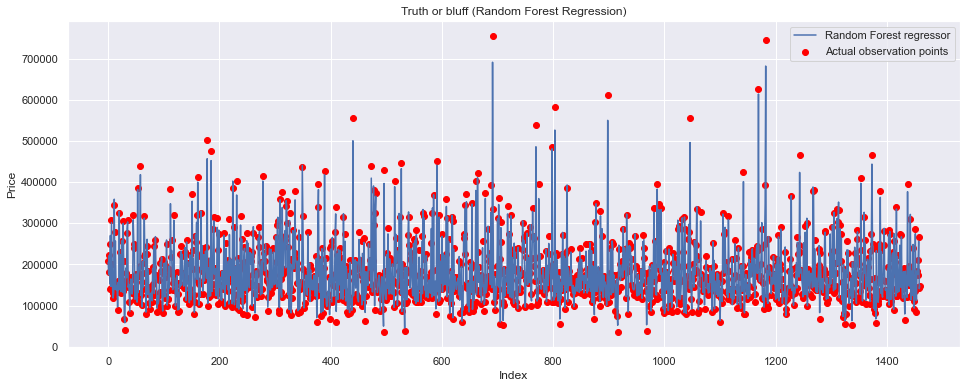

In [104]:
#plotting
sns.set(style = 'darkgrid')
plt.figure(figsize = (16,6))
plt.scatter(Ultimate_train.index,Ultimate_Train_y, color='red', label='Actual observation points')
plt.plot(Ultimate_train.index, model.predict(Ultimate_train), label='Random Forest regressor')
plt.title('Truth or bluff (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


Using  lasso Regression 

In [105]:
from sklearn.linear_model import Lasso
regr = Lasso(tol = 0.01)
regr.fit(Ultimate_train,Ultimate_Train_y)

Lasso(tol=0.01)

In [106]:
use1 = regr.predict(Ultimate_test)
Hexagon1 = regr.predict(Ultimate_train)

In [107]:
kai2 = Ultimate_Train_y.to_numpy()
mean_squared_error(kai2,Hexagon1)

947570955.9377382

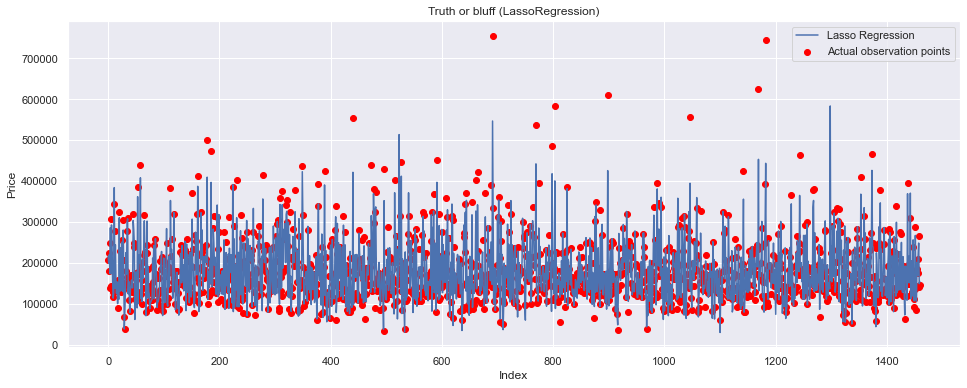

In [108]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (16,6))
plt.scatter(Ultimate_train.index,Ultimate_Train_y, color='red', label='Actual observation points')
plt.plot(Ultimate_train.index, regr.predict(Ultimate_train), label='Lasso Regression')
plt.title('Truth or bluff (LassoRegression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Using Lars lasso

In [109]:
from sklearn.linear_model import LassoLars
lars = LassoLars(alpha=0.001)
lars.fit(Ultimate_train,Ultimate_Train_y)

LassoLars(alpha=0.001)

In [110]:
Hexagon3 = lars.predict(Ultimate_train)

In [111]:
kai4 = Ultimate_Train_y.to_numpy()
mean_squared_error(kai4,Hexagon3)

947568706.6889946

Using DecisionTreeRegressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(Ultimate_train,Ultimate_Train_y)

DecisionTreeRegressor()

In [113]:
Hexagon4 = tree.predict(Ultimate_train)

In [114]:
kai5 = Ultimate_Train_y.to_numpy()
mean_squared_error(kai5,Hexagon4)

0.0

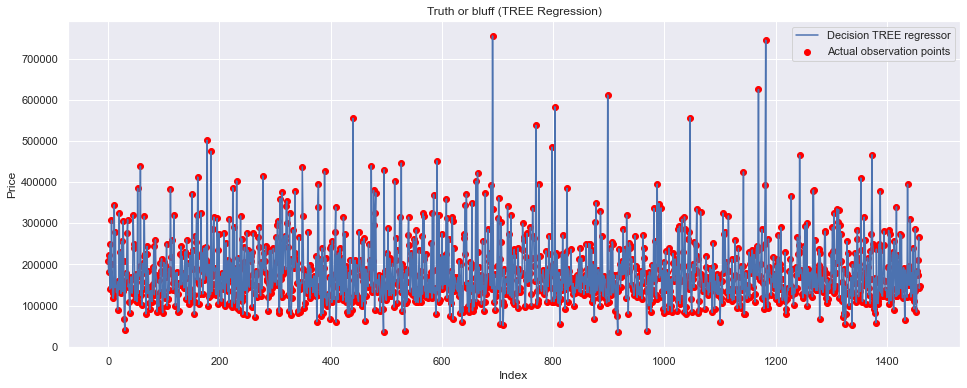

In [115]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (16,6))
plt.scatter(Ultimate_train.index,Ultimate_Train_y, color='red', label='Actual observation points')
plt.plot(Ultimate_train.index, tree.predict(Ultimate_train), label='Decision TREE regressor')
plt.title('Truth or bluff (TREE Regression)')
plt.xlabel('Index')
plt.ylabel('Price')

plt.legend()
plt.show()


Using KNN

In [116]:
from sklearn.neighbors import KNeighborsRegressor
neighbor = KNeighborsRegressor(n_neighbors=1,algorithm='ball_tree')
neighbor.fit(Ultimate_train,Ultimate_Train_y)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=1)

In [117]:
Hexagon5 = neighbor.predict(Ultimate_train)

In [118]:
kai6 = Ultimate_Train_y.to_numpy()
#r2_score(kai6,Hexagon5)
mean_squared_error(kai6,Hexagon5)

0.0

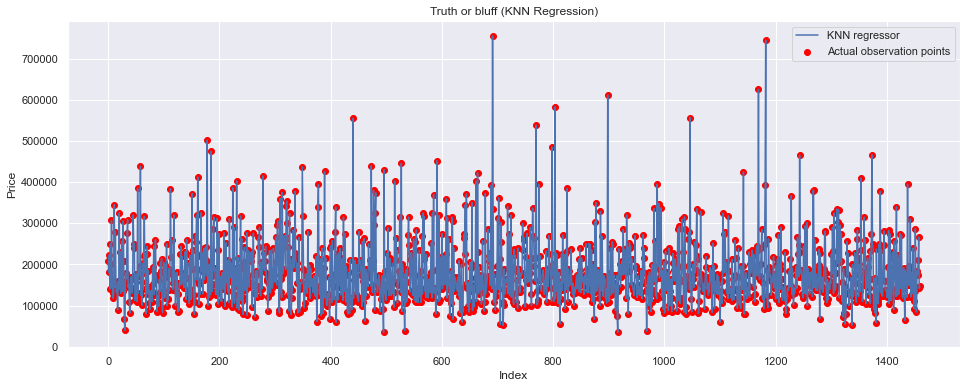

In [119]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (16,6))
plt.scatter(Ultimate_train.index,Ultimate_Train_y, color='red', label='Actual observation points')
plt.plot(Ultimate_train.index, neighbor.predict(Ultimate_train), label='KNN regressor')
plt.title('Truth or bluff (KNN Regression)')
plt.xlabel('Index')
plt.ylabel('Price')

plt.legend()
plt.show()


In [120]:
#Selected regressor is KNN Regressor

In [121]:
price = neighbor.predict(Ultimate_test)